<a href="https://colab.research.google.com/github/mcrank1/WeatherInChicagoAnalysis/blob/main/WeatherInChicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Description**

This project is a data analysis of weather patterns in Cook County, Illinois, between 1/1/2016 and 12/31/2024. The goal is to identify trends and evaluate whether certain types of weather events have become more severe or frequent, or if they have remained relatively steady over time. By analyzing historical weather data, this project seeks to provide insights into long-term patterns that may impact the region.


*This data is retreived from the NOAA
https://www.ncei.noaa.gov/stormevents/*

In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

#Read CSV file
Flood_Data = pd.read_csv('/content/drive/MyDrive/flood_data_cook.csv')
Flood_Data.head()
Flood_Data.info()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             108 non-null    int64  
 1   CZ_NAME_STR          108 non-null    object 
 2   BEGIN_LOCATION       108 non-null    object 
 3   BEGIN_DATE           108 non-null    object 
 4   BEGIN_TIME           108 non-null    int64  
 5   EVENT_TYPE           108 non-null    object 
 6   MAGNITUDE            108 non-null    object 
 7   TOR_F_SCALE          108 non-null    object 
 8   DEATHS_DIRECT        108 non-null    int64  
 9   INJURIES_DIRECT      108 non-null    int64  
 10  DAMAGE_PROPERTY_NUM  108 non-null    int64  
 11  DAMAGE_CROPS_NUM     108 non-null    int64  
 12  STATE_ABBR           108 non-null    object 
 13  CZ_TIMEZONE

In [ ]:
#Converting Date
Flood_Data['Date'] = pd.to_datetime(Flood_Data['BEGIN_DATE'])

#New Collumn for Year
Flood_Data['Year'] = Flood_Data['Date'].dt.year

#New Collumn for Month
Flood_Data['Month'] = Flood_Data['Date'].dt.month

#New Collumn for Day
Flood_Data['Day'] = Flood_Data['Date'].dt.day

yearly_counts = Flood_Data['Year'].value_counts().sort_index()
print(yearly_counts)

Year
2016     1
2017     5
2018    14
2019    21
2020    24
2021     8
2022     6
2023    11
2024    18
Name: count, dtype: int64


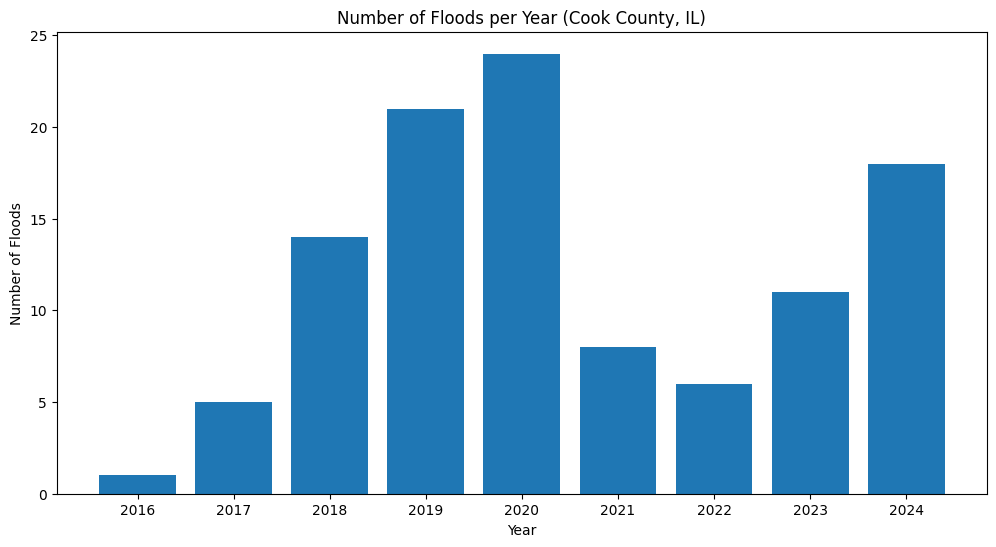

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.title('Number of Floods per Year (Cook County, IL)')

#show every year on xlabel
plt.xticks(yearly_counts.index)
plt.show()


According to NOAA data, the graph indicates a significant increase in flash floods in Cook County between 2018 and 2020. While the numbers declined in 2021, the trend appears to be rising again in the years that followed.

In [ ]:
Winter_Storm_Data = pd.read_csv('/content/drive/MyDrive/WinterStorm_Data_Chicago.csv')
Winter_Storm_Data.head()
Winter_Storm_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EVENT_ID             23 non-null     int64  
 1   CZ_NAME_STR          23 non-null     object 
 2   BEGIN_LOCATION       23 non-null     object 
 3   BEGIN_DATE           23 non-null     object 
 4   BEGIN_TIME           23 non-null     int64  
 5   EVENT_TYPE           23 non-null     object 
 6   MAGNITUDE            23 non-null     object 
 7   TOR_F_SCALE          23 non-null     object 
 8   DEATHS_DIRECT        23 non-null     int64  
 9   INJURIES_DIRECT      23 non-null     int64  
 10  DAMAGE_PROPERTY_NUM  23 non-null     int64  
 11  DAMAGE_CROPS_NUM     23 non-null     int64  
 12  STATE_ABBR           23 non-null     object 
 13  CZ_TIMEZONE          23 non-null     object 
 14  MAGNITUDE_TYPE       23 non-null     object 
 15  EPISODE_ID           23 non-null     int64

In [ ]:
#Converting Date
Winter_Storm_Data['Date'] = pd.to_datetime(Winter_Storm_Data['BEGIN_DATE'])

#New Collumn for Year
Winter_Storm_Data['Year'] = Winter_Storm_Data['Date'].dt.year

#New Collumn for Month
Winter_Storm_Data['Month'] = Winter_Storm_Data['Date'].dt.month

#New Collumn for Day
Winter_Storm_Data['Day'] = Winter_Storm_Data['Date'].dt.day

yearly_counts = Winter_Storm_Data['Year'].value_counts().sort_index()

#Create a full range of years adding 0 for years that don't have any winter storms.
for year in range(2016, 2025):
    if year not in yearly_counts.index:
        yearly_counts[year] = 0

yearly_counts = yearly_counts.sort_index()
print(yearly_counts)

Year
2016    0
2017    0
2018    2
2019    2
2020    0
2021    8
2022    7
2023    0
2024    4
Name: count, dtype: int64


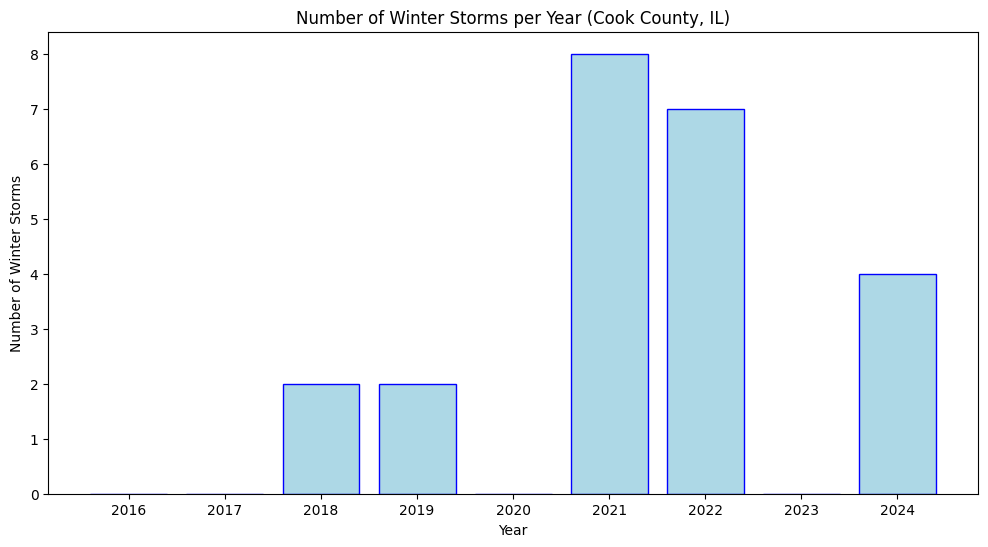

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(yearly_counts.index, yearly_counts.values,
        color='lightblue', edgecolor= 'blue')
plt.xlabel('Year')
plt.ylabel('Number of Winter Storms')
plt.title('Number of Winter Storms per Year (Cook County, IL)')

#show every year on xlabel
plt.xticks(yearly_counts.index)
plt.show()

There were 4x more winter storms in 2021 than there were in 2019, but the date shows that there has been 0 winter storms in 2023 and 2024.

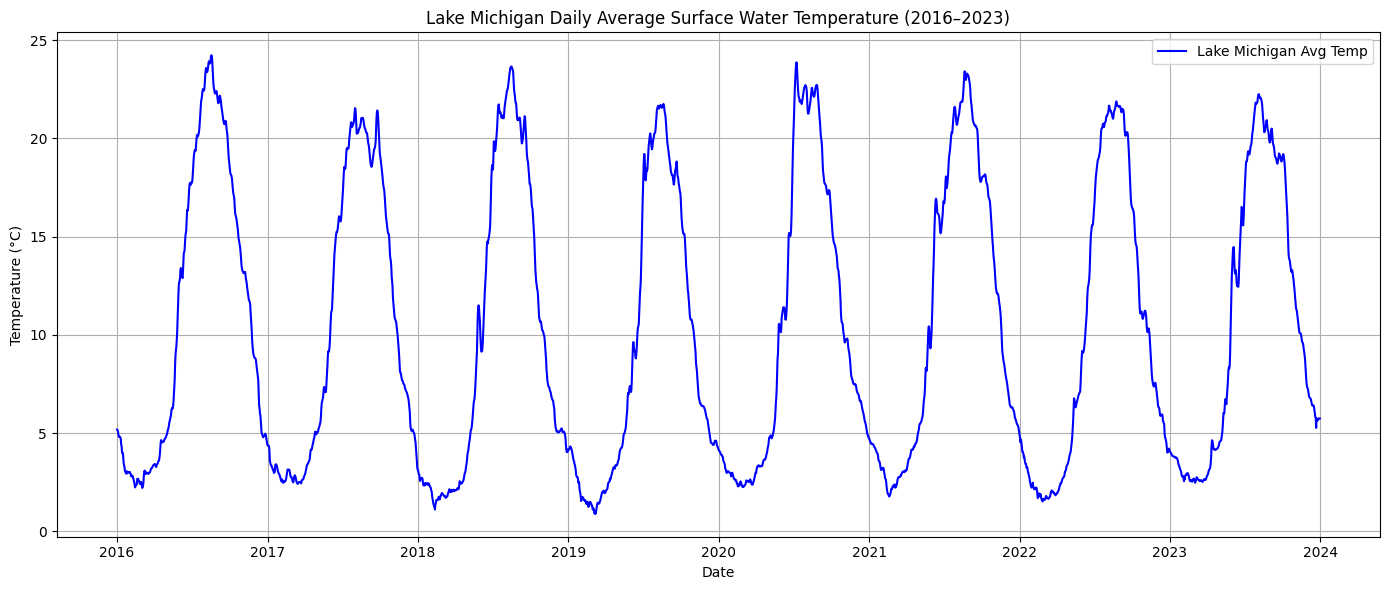

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests
from io import StringIO


urls = [
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2016/glsea-temps2016_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2017/glsea-temps2017_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2018/glsea-temps2018_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2019/glsea-temps2019_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2020/glsea-temps2020_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2021/glsea-temps2021_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2022/glsea-temps2022_1024.dat",
    "https://apps.glerl.noaa.gov/coastwatch/ftp/glsea/avgtemps/2023/glsea-temps2023_1024.dat"
]


# Function to convert day-of-year to date
def doy_to_date(year, doy):
    return datetime(year, 1, 1) + timedelta(days=doy - 1)


# Step 3: Download, clean, and process each file

dfs = []

for url in urls:
    year = int(url.split('/')[-2])  # extract year from URL

    # Download file
    response = requests.get(url)
    response.raise_for_status()

    # Read CSV, skip first 6 header rows
    df = pd.read_csv(StringIO(response.text), sep=r'\s+', header=None, skiprows=6,
                     names=['Year', 'Day', 'Sup', 'Mich', 'Huron', 'Erie', 'Ont', 'StClr'])

    # Keep only numeric rows (skip extra header lines)
    df = df[pd.to_numeric(df['Year'], errors='coerce').notnull()]

    # Convert all columns to numeric
    cols = ['Year', 'Day', 'Sup', 'Mich', 'Huron', 'Erie', 'Ont', 'StClr']
    df[cols] = df[cols].apply(pd.to_numeric)

    # Convert day-of-year to date
    df['Date'] = df.apply(lambda row: doy_to_date(int(row['Year']), int(row['Day'])), axis=1)

    # Keep only Date and Lake Michigan column
    df = df[['Date', 'Mich']]

    dfs.append(df)


# Combine all years

combined_df = pd.concat(dfs, ignore_index=True)


combined_df = combined_df[(combined_df['Date'] >= '2016-01-01') & (combined_df['Date'] <= '2023-12-31')]


#Plot the line graph

plt.figure(figsize=(14,6))
plt.plot(combined_df['Date'], combined_df['Mich'], color='blue', label='Lake Michigan Avg Temp')
plt.title("Lake Michigan Daily Average Surface Water Temperature (2016–2023)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Based on the daily average surface water temperatures of Lake Michigan over the past eight years, the data appears to have remained relatively steady. The highest peak occurred during the summer of 2016. One notable observation is that the winter of 2023–2024 shows a slight increase in temperature compared to previous years, though the overall change is minimal.